In [1]:
# Cell 1: Import Libraries
# Import necessary libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from time import time
from collections import Counter
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Cell 2: Load Dataset
# Load the dataset from Google Drive
sales_data = pd.read_csv('Company_Data.csv')
sales_data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [3]:
# Cell 3: Data Understanding
# Check for missing values in the dataset
sales_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
# Cell 4: Descriptive Analysis
# Get the shape and basic information about the dataset
sales_data.shape
sales_data.info()
sales_data[sales_data.duplicated()].shape
sales_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

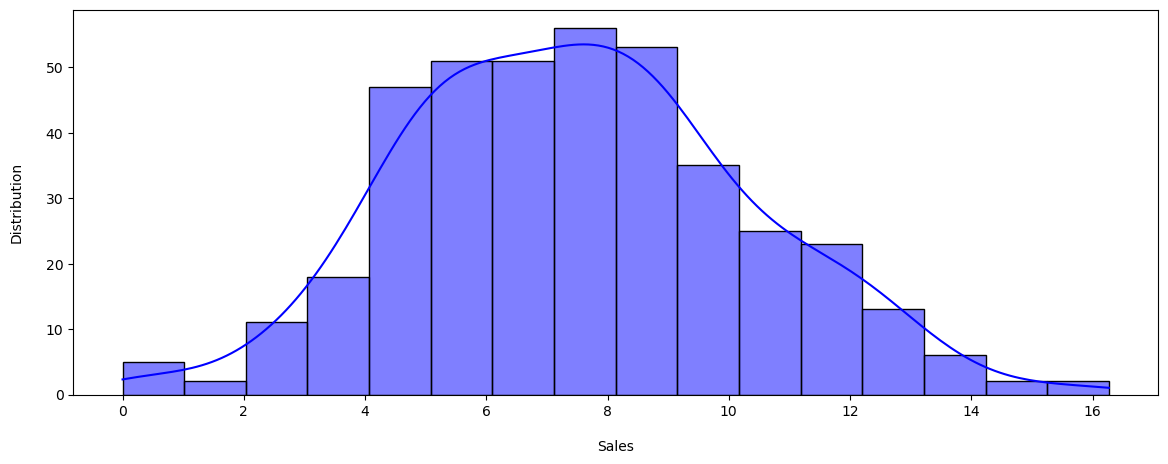

In [5]:
# Cell 5: Feature Engineering
# Define a function to plot the distribution of a given feature
def plot_distribution(feature):
  plt.figure(figsize=(14,5))
  sns.histplot(sales_data[feature], color="blue", kde=True)
  plt.xlabel('\n' + feature)
  plt.ylabel('Distribution\n')
  plt.show()

# Plot the distribution of the 'Sales' feature
plot_distribution("Sales")

In [6]:
# Cell 6: Categorize Sales
# Create a copy of the dataset and categorize 'Sales' into bins
sales_data_enhanced = sales_data.copy()
sales_data_enhanced['SalesCategory'] = pd.cut(x=sales_data_enhanced['Sales'], bins=[0, 5.39, 9.32, 17], labels=['Low', 'Medium', 'High'], right=False)
sales_data_enhanced.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US SalesCategory  
0         17   Yes  Yes          High  
1         10   Yes  Yes          High  
2         12   Yes  Yes          High  
3         14   Yes  Yes        Medium  
4         13   Yes   No           Low

In [30]:
# Cell 7: Categorical and Numerical Features
# Identify categorical and numerical features in the dataset
categorical_features = sales_data_enhanced.describe(include=["object", 'category']).columns
numerical_features = sales_data_enhanced.describe(include=["int64", "float64"]).columns

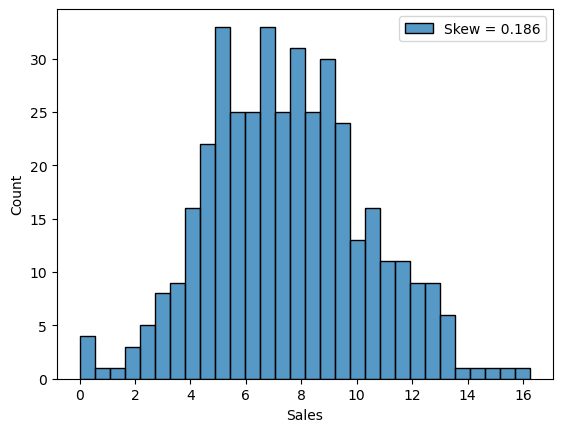

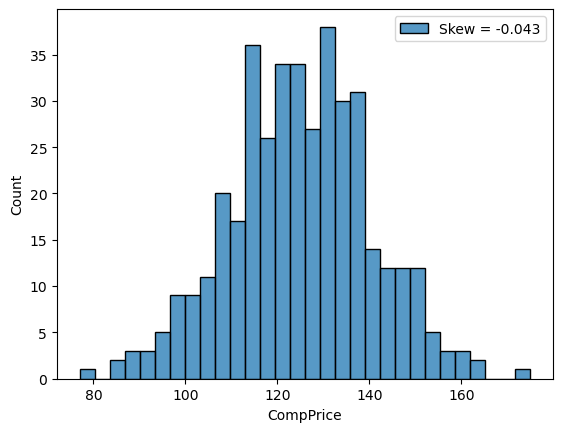

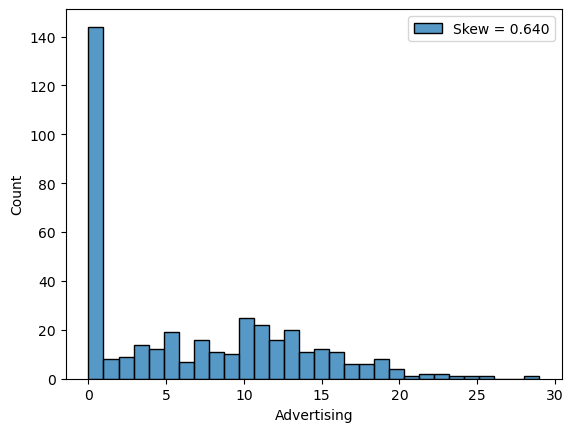

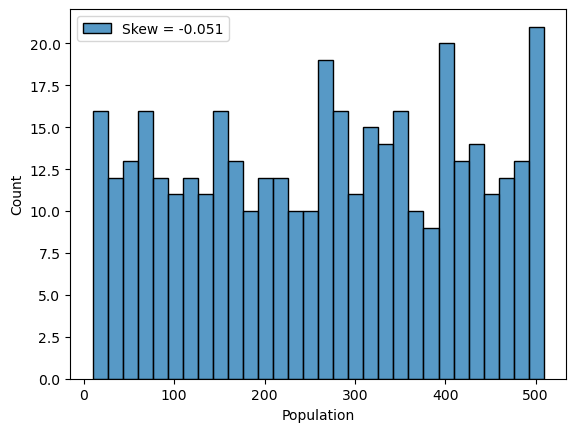

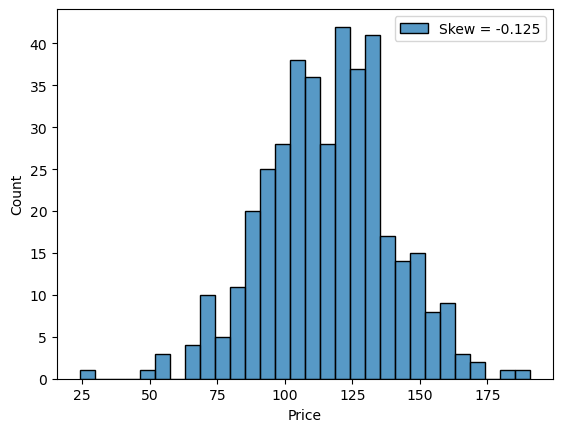

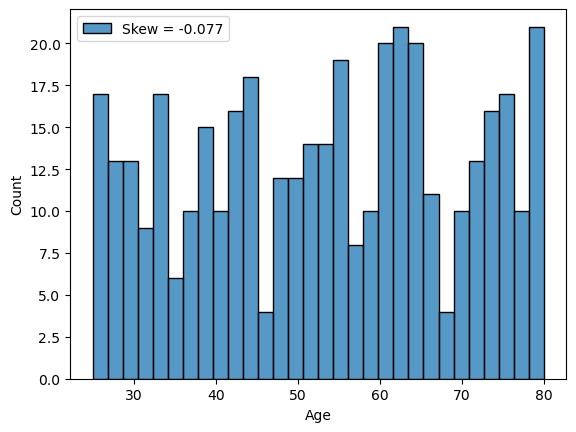

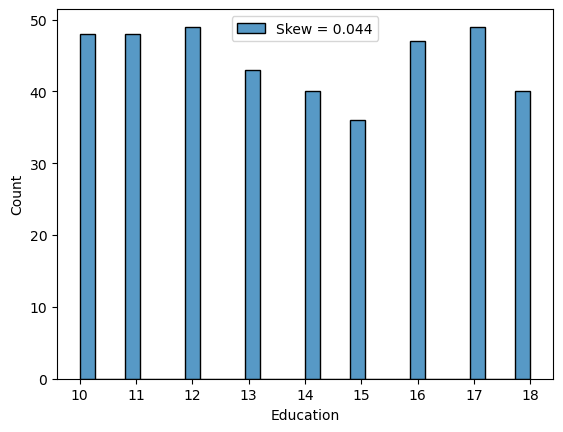

In [31]:
# Cell 8: Exploratory Data Analysis - Univariate Plots
# Plot the distribution of numerical features
for feature in numerical_features:
  skewness = sales_data[feature].skew()
  sns.histplot(sales_data[feature], kde=False, label=f'Skew = {skewness:.3f}', bins=30)
  plt.legend(loc='best')
  plt.show()

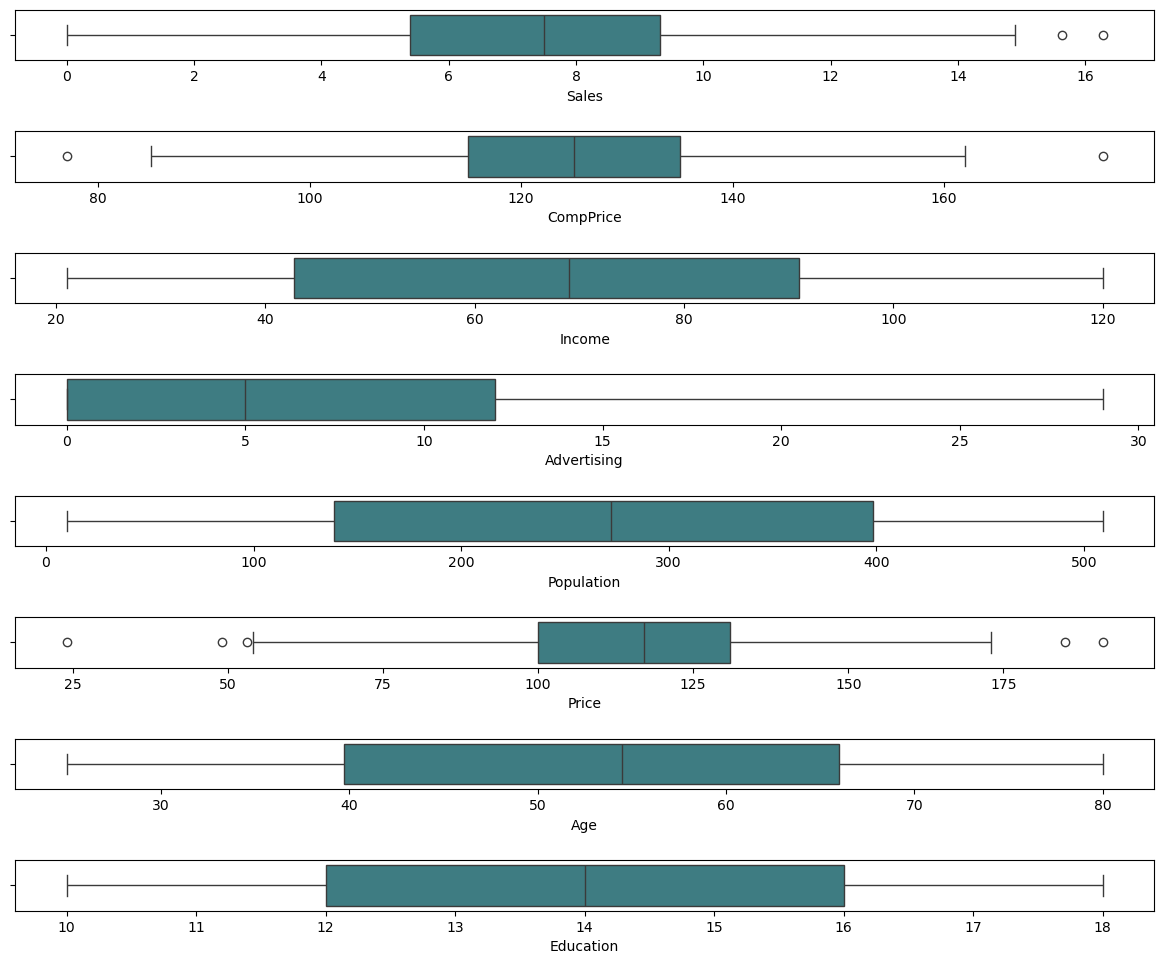

In [9]:
# Cell 9: Outliers Detection
# Plot boxplots to detect outliers in numerical features
fig, axes = plt.subplots(8, 1, figsize=(12, 10), sharex=False, sharey=False)
sns.boxplot(x='Sales', data=sales_data, palette='crest', ax=axes[0])
sns.boxplot(x='CompPrice', data=sales_data, palette='crest', ax=axes[1])
sns.boxplot(x='Income', data=sales_data, palette='crest', ax=axes[2])
sns.boxplot(x='Advertising', data=sales_data, palette='crest', ax=axes[3])
sns.boxplot(x='Population', data=sales_data, palette='crest', ax=axes[4])
sns.boxplot(x='Price', data=sales_data, palette='crest', ax=axes[5])
sns.boxplot(x='Age', data=sales_data, palette='crest', ax=axes[6])
sns.boxplot(x='Education', data=sales_data, palette='crest', ax=axes[7])
plt.tight_layout(pad=2.0)

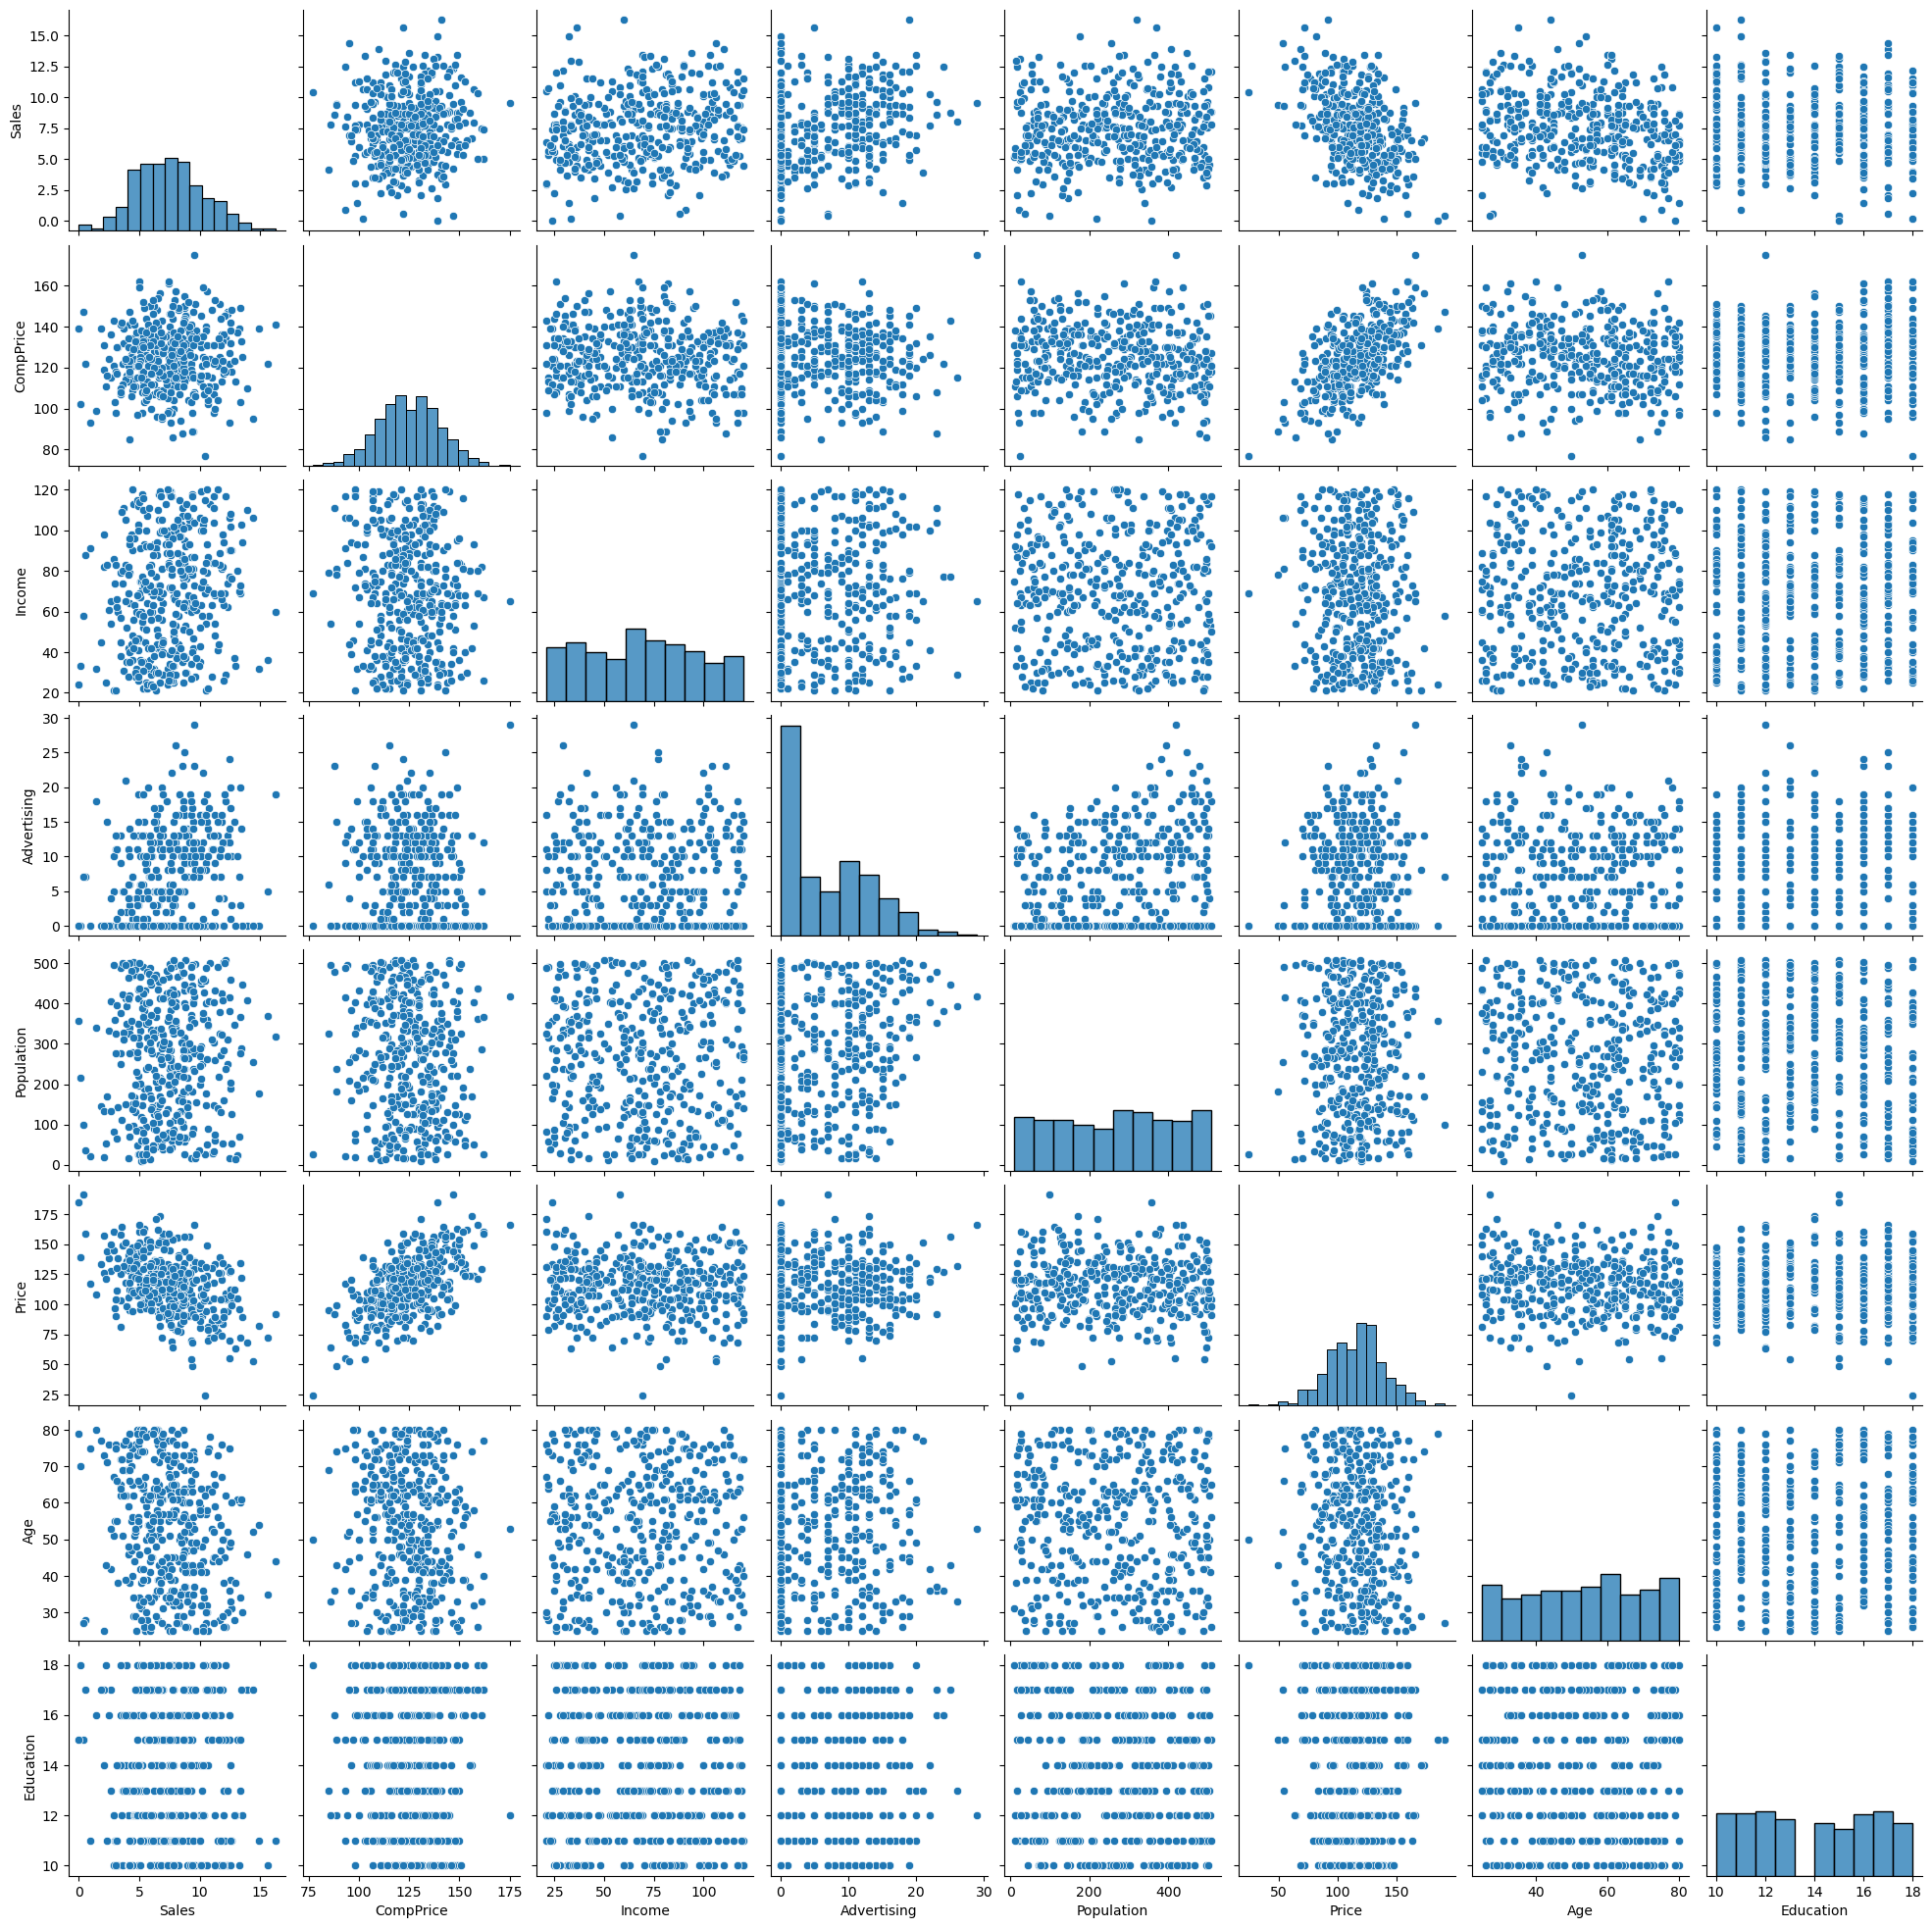

In [10]:
# Cell 10: Multivariate Analysis
# Plot pairplot to visualize relationships between features
sns.pairplot(sales_data, palette='coolwarm')
plt.show()

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object


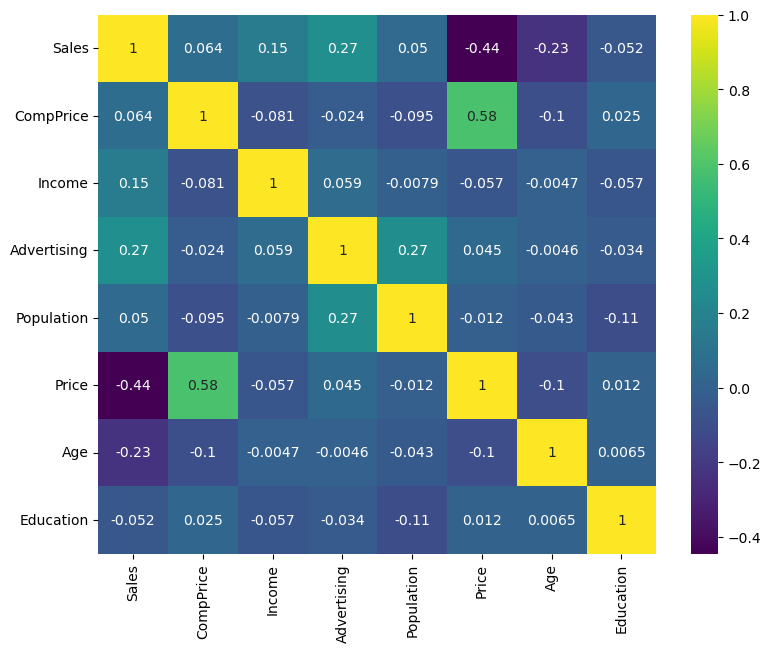

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame
# sales_data = pd.read_csv('your_data.csv')  # Load your data here

# Check data types
print(sales_data.dtypes)

# Select only numeric columns
numeric_data = sales_data.select_dtypes(include=[float, int])

# Optionally, handle missing or invalid data
# numeric_data = numeric_data.fillna(0)  # Example: fill NaNs with 0
# numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, set errors to NaN

# Plot the correlation matrix
fig, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

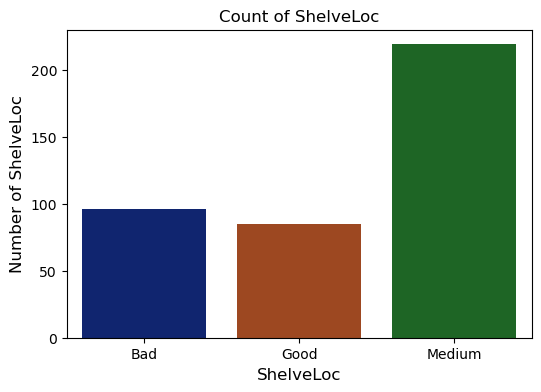

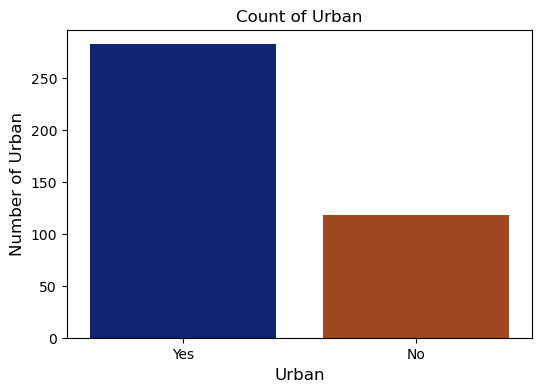

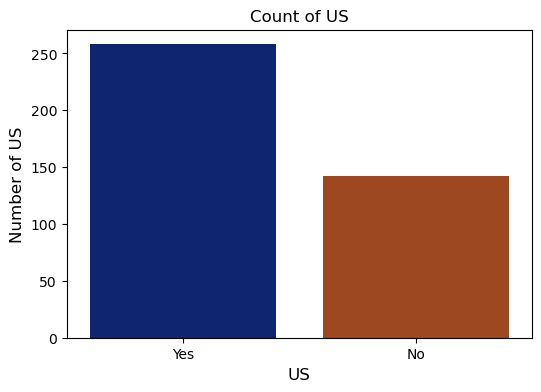

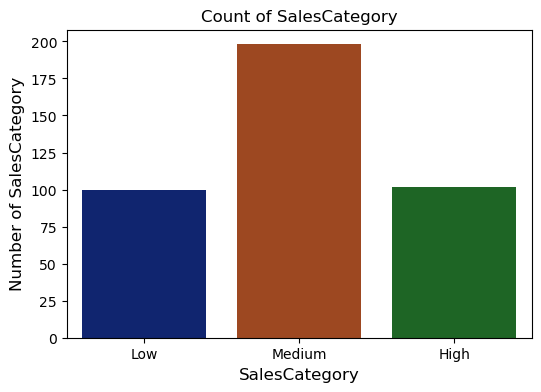

In [12]:
# Cell 12: Categorical Feature Distribution
# Plot the distribution of categorical features
for column in categorical_features:
  plt.figure(figsize=(6, 4))
  sns.countplot(data=sales_data_enhanced, x=column, palette="dark")
  plt.title(f"Count of {column}")
  plt.xlabel(column, fontsize=12)
  plt.ylabel(f"Number of {column}", fontsize=12)
  plt.show()

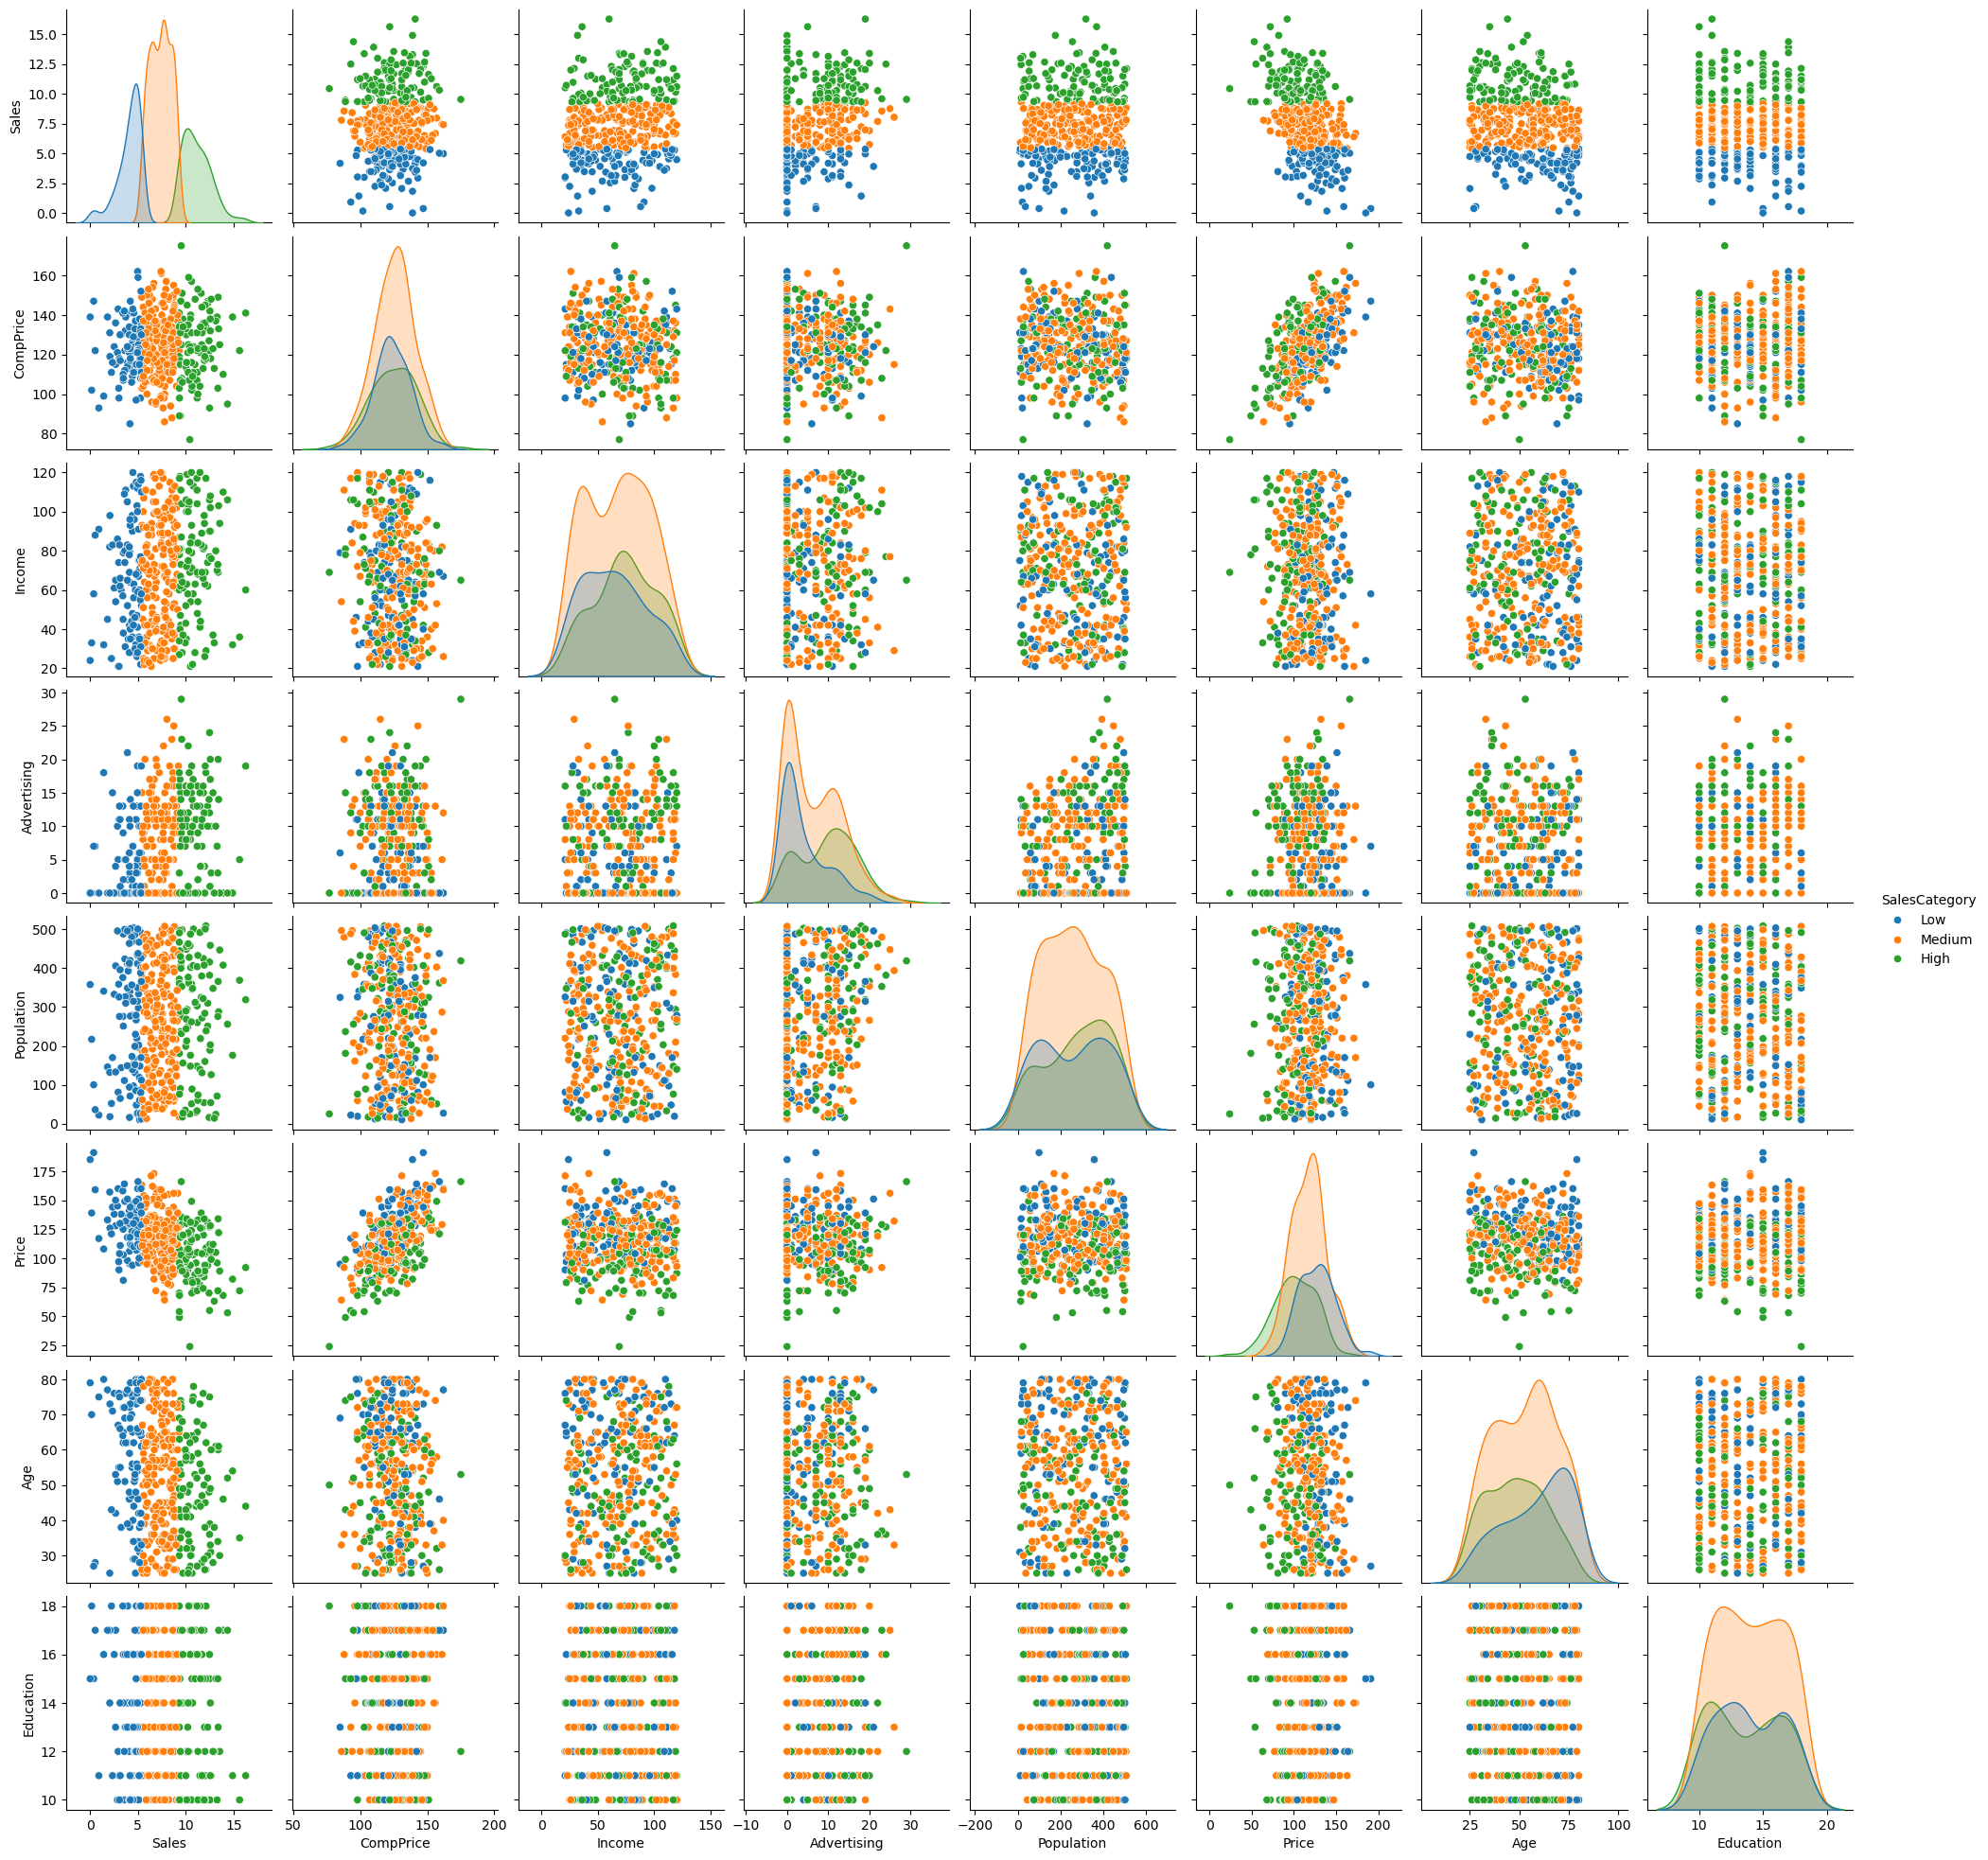

In [13]:
# Cell 13: Pairplot with Sales Category
# Plot pairplot with 'SalesCategory' as hue
sns.pairplot(data=sales_data_enhanced, hue='SalesCategory')
plt.show()

In [14]:
# Cell 14: Encode Categorical Features
# Encode categorical features using one-hot encoding
sales_data_encoded = sales_data_enhanced.copy()
sales_data_encoded.drop('Sales', axis=1, inplace=True)
sales_data_encoded = pd.get_dummies(sales_data_encoded.iloc[:, :-1])
sales_data_encoded.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0           True           False             False     False       True   
1          False            True             False     False       True   
2          False           False              True     False       True   
3          False           False              True     False       True   
4           True           False             False     False       True   

   US_No  US_Yes  
0  False    True  
1  False    True  
2  False    True  
3  False    True  
4   True   False

In [15]:
# Cell 15: Feature Selection
# Use SelectKBest to select top features based on chi-squared test
x = sales_data_encoded
y = sales_data_enhanced['SalesCategory']
selector = SelectKBest(score_func=chi2, k=4)
selector.fit(x, y)
scores = selector.scores_

In [16]:
# Cell 16: Feature Scores
# Display feature scores
feature_scores = pd.DataFrame(list(zip(x.columns, scores)), columns=['Feature', 'Score'])
feature_scores.sort_values(by="Score", ascending=False, inplace=True)
feature_scores

Feature       Score
4              Price  300.881058
2        Advertising  251.767458
3         Population  141.113336
5                Age  106.577639
8     ShelveLoc_Good   66.174919
1             Income   65.145403
7      ShelveLoc_Bad   48.524460
12             US_No   13.109136
9   ShelveLoc_Medium    8.654770
13            US_Yes    7.215106
0          CompPrice    2.253637
6          Education    0.689685
10          Urban_No    0.163751
11         Urban_Yes    0.068520

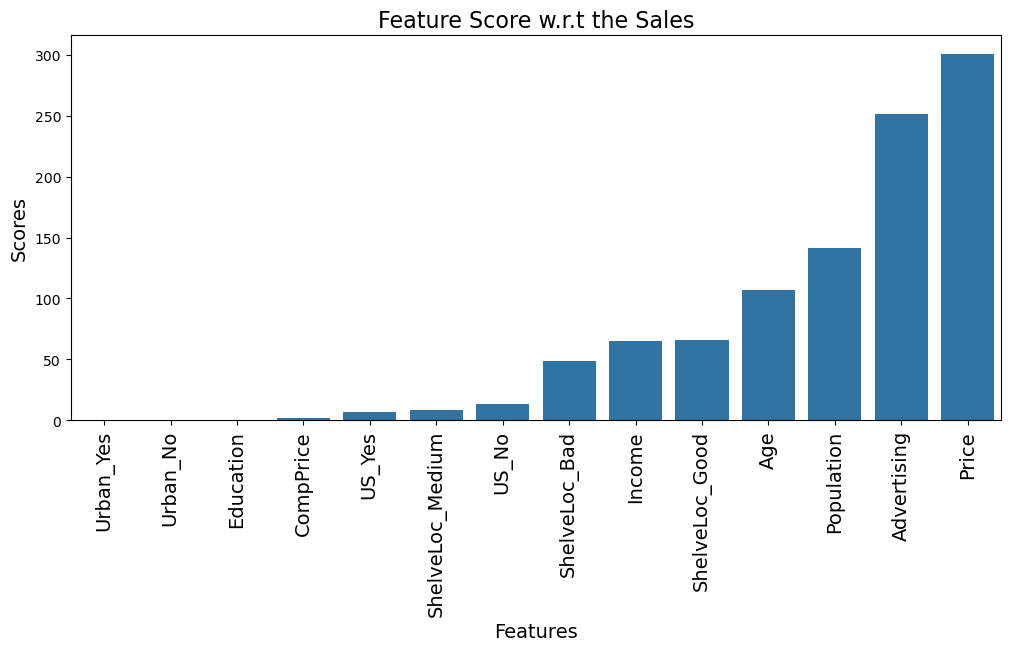

In [17]:
# Cell 17: Plot Feature Scores
# Plot the scores of features
plt.figure(figsize=(12, 5))
sns.barplot(x='Feature', y='Score', data=feature_scores, order=feature_scores.sort_values('Score').Feature)
plt.xlabel("Features", size=14)
plt.ylabel("Scores", size=14)
plt.title("Feature Score w.r.t the Sales", size=16)
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [18]:
# Cell 18: Random Forest Feature Importance
# Train a Random Forest model and plot feature importance
rf_model1 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)
rf_model1.fit(x, y)

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {'max_depth': [2, 3, 5, 10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100, 200], 'n_estimators': [10, 25, 30, 50, 100, 200]}

grid_search = GridSearchCV(estimator=rf_model, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(x, y)
rf_best = grid_search.best_estimator_

print('Checking the oob score :', rf_model1.oob_score_)
print('Best Score             :', grid_search.best_score_)
print('RF Best Model          :', rf_best)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Checking the oob score : 0.6375
Best Score             : 0.6675
RF Best Model          : RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)


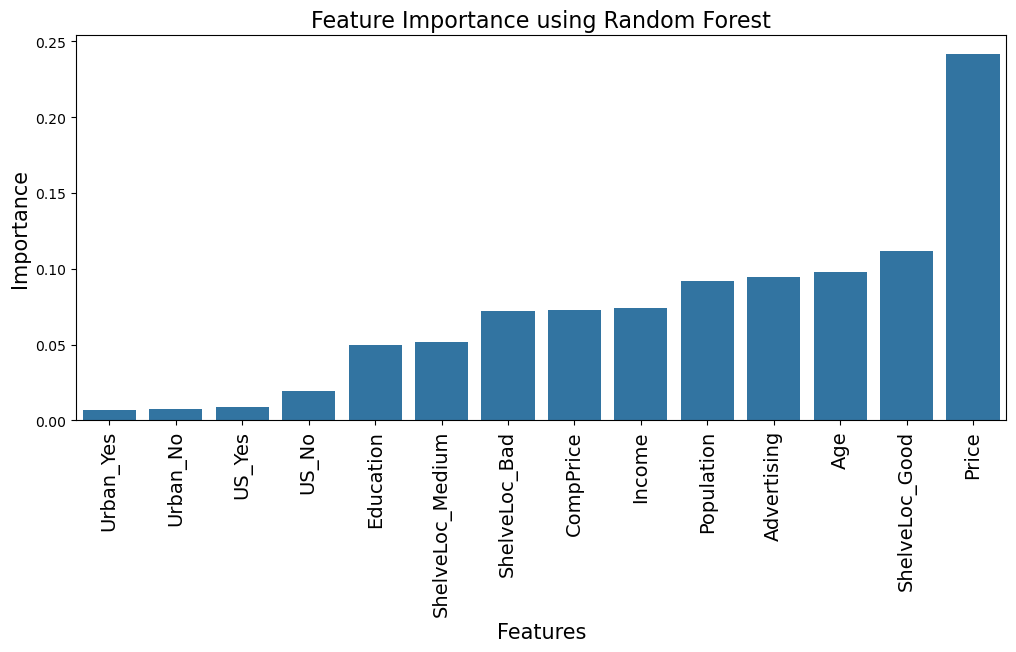

In [19]:
# Cell 19: Plot Random Forest Feature Importance
# Plot feature importance from the best Random Forest model
importance_df = pd.DataFrame({"Feature": x.columns, "Importance": rf_best.feature_importances_})

plt.figure(figsize=(12, 5))
sns.barplot(x='Feature', y='Importance', data=importance_df, order=importance_df.sort_values('Importance').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.title("Feature Importance using Random Forest", size=16)
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [20]:
# Cell 20: Train-Test Split
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

print("Shape of x_train : ", x_train.shape)
print("Shape of x_test  : ", x_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test  : ", y_test.shape)

Shape of x_train :  (280, 14)
Shape of x_test  :  (120, 14)
Shape of y_train :  (280,)
Shape of y_test  :  (120,)


In [21]:
# Cell 21: Stratified K-Fold
# Perform stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

# Enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
  train_x, test_x = x.iloc[train_ix], x.loc[test_ix]
  train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]

  # Summarize train and test composition
  counter_train = Counter(train_y)
  counter_test = Counter(test_y)
  print('Training Data :', counter_train)
  print('Testing Data  :', counter_test)

Training Data : Counter({'Medium': 179, 'High': 91, 'Low': 90})
Testing Data  : Counter({'Medium': 19, 'High': 11, 'Low': 10})
Training Data : Counter({'Medium': 179, 'High': 91, 'Low': 90})
Testing Data  : Counter({'Medium': 19, 'High': 11, 'Low': 10})
Training Data : Counter({'Medium': 178, 'High': 92, 'Low': 90})
Testing Data  : Counter({'Medium': 20, 'Low': 10, 'High': 10})
Training Data : Counter({'Medium': 178, 'High': 92, 'Low': 90})
Testing Data  : Counter({'Medium': 20, 'High': 10, 'Low': 10})
Training Data : Counter({'Medium': 178, 'High': 92, 'Low': 90})
Testing Data  : Counter({'Medium': 20, 'High': 10, 'Low': 10})
Training Data : Counter({'Medium': 178, 'High': 92, 'Low': 90})
Testing Data  : Counter({'Medium': 20, 'Low': 10, 'High': 10})
Training Data : Counter({'Medium': 178, 'High': 92, 'Low': 90})
Testing Data  : Counter({'Medium': 20, 'High': 10, 'Low': 10})
Training Data : Counter({'Medium': 178, 'High': 92, 'Low': 90})
Testing Data  : Counter({'Medium': 20, 'High': 

In [22]:
# Cell 22: Random Forest with Stratified K-Fold
# Train and evaluate a Random Forest model using stratified K-Fold
rf_model2 = RandomForestClassifier(n_estimators=100)
rf_model2.fit(train_x, train_y)

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
  if train:
      pred = clf.predict(x_train)
      clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
      print("Train Result:\n==========================================================================")
      print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
      print("__________________________________________________________________________")
      print(f"CLASSIFICATION REPORT:\n{clf_report}")
      print("__________________________________________________________________________")
      print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

  elif train == False:
      pred = clf.predict(x_test)
      clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
      print("Test Result:\n==========================================================================")
      print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
      print("__________________________________________________________________________")
      print(f"CLASSIFICATION REPORT:\n{clf_report}")
      print("__________________________________________________________________________")
      print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

print_score(rf_model2, train_x, train_y, test_x, test_y, train=True)
print_score(rf_model2, train_x, train_y, test_x, test_y, train=False)

Train Result:
Accuracy Score: 100.00%
__________________________________________________________________________
CLASSIFICATION REPORT:
           High   Low  Medium  accuracy  macro avg  weighted avg
precision   1.0   1.0     1.0       1.0        1.0           1.0
recall      1.0   1.0     1.0       1.0        1.0           1.0
f1-score    1.0   1.0     1.0       1.0        1.0           1.0
support    92.0  90.0   178.0       1.0      360.0         360.0
__________________________________________________________________________
Confusion Matrix: 
 [[ 92   0   0]
 [  0  90   0]
 [  0   0 178]]

Test Result:
Accuracy Score: 60.00%
__________________________________________________________________________
CLASSIFICATION REPORT:
                High        Low     Medium  accuracy  macro avg  weighted avg
precision   0.800000   0.555556   0.576923       0.6   0.644160      0.627350
recall      0.400000   0.500000   0.750000       0.6   0.550000      0.600000
f1-score    0.533333   0.5263

In [23]:
# Cell 23: Handling Imbalanced Data with SMOTE
# Use SMOTE to handle class imbalance in the dataset
smote = SMOTE()
x_train_sm, y_train_sm = smote.fit_resample(x_train, y_train)

print('Before SMOTE:', Counter(y_train))
print('After SMOTE :', Counter(y_train_sm))

Before SMOTE: Counter({'Medium': 139, 'High': 71, 'Low': 70})
After SMOTE : Counter({'Medium': 139, 'Low': 139, 'High': 139})


In [24]:
# Cell 24: Handling Imbalanced Data with ADASYN
# Use ADASYN to handle class imbalance in the dataset
adasyn = ADASYN(random_state=130)
x_train_ada, y_train_ada = adasyn.fit_resample(x_train, y_train)

print('Before ADASYN:', Counter(y_train))
print('After ADASYN :', Counter(y_train_ada))

Before ADASYN: Counter({'Medium': 139, 'High': 71, 'Low': 70})
After ADASYN : Counter({'Medium': 139, 'High': 138, 'Low': 137})


In [25]:
# Cell 25: Hybrid Resampling with SMOTE + Tomek Links
# Use SMOTE + Tomek Links to handle class imbalance
smtomek = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtomek.fit_resample(x_train, y_train)

print('Before SMOTE + Tomek:', Counter(y_train))
print('After SMOTE + Tomek :', Counter(y_train_smtom))

Before SMOTE + Tomek: Counter({'Medium': 139, 'High': 71, 'Low': 70})
After SMOTE + Tomek : Counter({'Low': 132, 'High': 129, 'Medium': 122})


In [26]:
# Cell 26: Hybrid Resampling with SMOTE + ENN
# Use SMOTE + ENN to handle class imbalance
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

print('Before SMOTE + ENN:', Counter(y_train))
print('After SMOTE + ENN :', Counter(y_train_smenn))

Before SMOTE + ENN: Counter({'Medium': 139, 'High': 71, 'Low': 70})
After SMOTE + ENN : Counter({'Low': 61, 'High': 60, 'Medium': 15})


In [34]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

# Sample data dictionary
sample_data = {
  'ACTUAL': [x_train, y_train],
  'SMOTE': [x_train_sm, y_train_sm],
  'ADASYN': [x_train_ada, y_train_ada],
  'SMOTE_TOMEK': [x_train_smtom, y_train_smtom],
  'SMOTE_ENN': [x_train_smenn, y_train_smenn]
}

# Evaluation function
def test_eval(clf_model, x_test, y_test, algo=None, sampling=None):
  y_prob = clf_model.predict_proba(x_test)
  y_pred = clf_model.predict(x_test)

  print('Confusion Matrix')
  print('='*60)
  print(confusion_matrix(y_test, y_pred), "\n")
  print('Classification Report')
  print('='*60)
  print(classification_report(y_test, y_pred), "\n")

  f1 = f1_score(y_test, y_pred, average='micro')
  recall = recall_score(y_test, y_pred, average='micro')
  precision = precision_score(y_test, y_pred, average='micro')

  return algo, precision, recall, f1, sampling

# Model parameters
model_params = {
  'random-forest': {
      'model': RandomForestClassifier(random_state=42),
      'params': {
          "n_estimators": [5, 10, 15, 20, 25],
          'max_depth': [i for i in range(5, 16, 2)],
          'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
          'min_samples_leaf': [1, 2, 5],
          'criterion': ['gini', 'entropy'],
          'max_features': ['log2', 'sqrt']  # Removed 'auto'
      }
  }
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []

# Model training and evaluation
for model, model_hp in model_params.items():
  for resampl, data in sample_data.items():
      clf3 = RandomizedSearchCV(
          model_hp['model'],
          model_hp['params'],
          cv=cv,
          scoring='roc_auc_ovr',  # Specify multi_class option
          n_jobs=-1,
          verbose=1
      )
      clf3.fit(data[0], data[1])
      clf_best1 = clf3.best_estimator_
      print('='*60)
      print(model + ' with ' + resampl)
      print('-'*60)
      output.append(test_eval(clf_best1, x_test, y_test, model, resampl))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
random-forest with ACTUAL
------------------------------------------------------------
Confusion Matrix
[[18  0 13]
 [ 0 13 17]
 [ 5 10 44]] 

Classification Report
              precision    recall  f1-score   support

        High       0.78      0.58      0.67        31
         Low       0.57      0.43      0.49        30
      Medium       0.59      0.75      0.66        59

    accuracy                           0.62       120
   macro avg       0.65      0.59      0.61       120
weighted avg       0.64      0.62      0.62       120
 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
random-forest with SMOTE
------------------------------------------------------------
Confusion Matrix
[[25  0  6]
 [ 1 20  9]
 [10 12 37]] 

Classification Report
              precision    recall  f1-score   support

        High       0.69      0.81      0.75        31
         Low       0.62      0.67      0.65        30
   

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
n_estimators = [int(x) for x in np.linspace(start=10, stop=200, num=191)]  # Start from 10
max_features = ['sqrt', 'log2']  # Valid options for classification
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
  'n_estimators': n_estimators,
  'max_features': max_features,
  'max_depth': max_depth,
  'min_samples_split': min_samples_split,
  'min_samples_leaf': min_samples_leaf,
  'bootstrap': bootstrap
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up the RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator=rf_model, scoring='f1_weighted', param_distributions=random_grid,
                         n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_cv.fit(x_train, y_train)

# Get the best parameters
rf_best_params = rf_cv.best_params_
print(f"Best parameters: {rf_best_params}")

# Train the best model
rf_model = RandomForestClassifier(**rf_best_params)
rf_model.fit(x_train, y_train)

# Evaluate the model
print_score(rf_model, x_train, y_train, x_test, y_test, train=True)
print_score(rf_model, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 132, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
Train Result:
Accuracy Score: 98.57%
__________________________________________________________________________
CLASSIFICATION REPORT:
                High        Low      Medium  accuracy   macro avg  \
precision   0.985915   0.985714    0.985612  0.985714    0.985747   
recall      0.985915   0.985714    0.985612  0.985714    0.985747   
f1-score    0.985915   0.985714    0.985612  0.985714    0.985747   
support    71.000000  70.000000  139.000000  0.985714  280.000000   

           weighted avg  
precision      0.985714  
recall         0.985714  
f1-score       0.985714  
support      280.000000  
__________________________________________________________________________
Confusion Matrix: 
 [[ 70   0   1]
 [  0  69   1]
 [  1   1 137]]

Test Result:
Accuracy Score: 67.50%
__

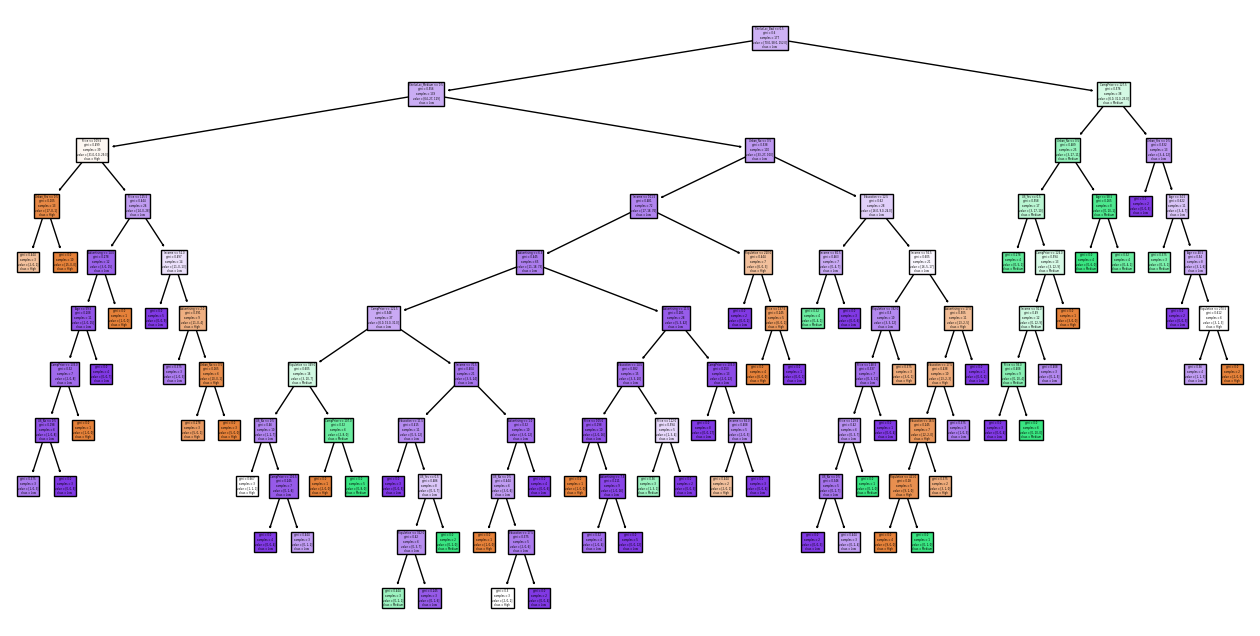

In [38]:
# Example: Assuming you have a DataFrame `x_train` with your training features
selected_features_data = x_train  # Replace with your actual feature DataFrame

# Now, proceed with the visualization
if hasattr(rf_cv, 'best_estimator_'):
  if hasattr(rf_cv.best_estimator_, 'estimators_'):
      plt.figure(figsize=(16, 8))
      plot_tree(
          rf_cv.best_estimator_.estimators_[0],  # Access the first tree
          feature_names=selected_features_data.columns,  # Feature names
          class_names=sales_data_enhanced.SalesCategory.unique().astype(str),  # Class names
          filled=True  # Fill the nodes with colors
      )
      plt.show()
  else:
      print("The best_estimator_ does not have the 'estimators_' attribute. Ensure it is a fitted RandomForestClassifier.")
else:
  print("The rf_cv object does not have the 'best_estimator_' attribute. Ensure it is a fitted GridSearchCV or RandomizedSearchCV object.")